In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ga_data_list=[
               
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]

pr_data_list=[
              
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
               

                ]


ga_data_all=pd.DataFrame()
pr_data_all=pd.DataFrame()
for i in range(len(ga_data_list)):
    ga_data=pd.read_csv(ga_data_list[i])
    pr_data=pd.read_csv(pr_data_list[i])
    ga_data_all=pd.concat([ga_data_all,ga_data],axis=0)
    pr_data_all=pd.concat([pr_data_all,pr_data],axis=0)



    

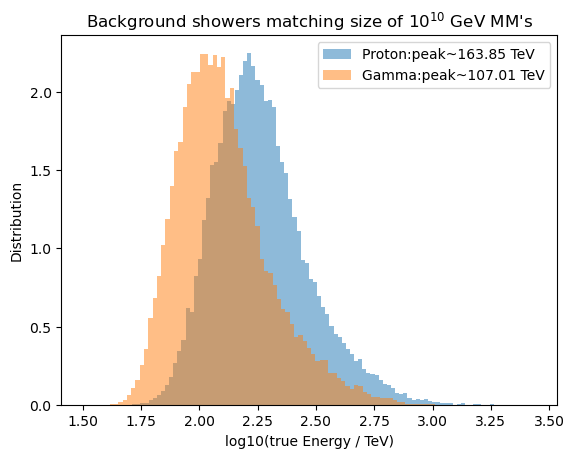

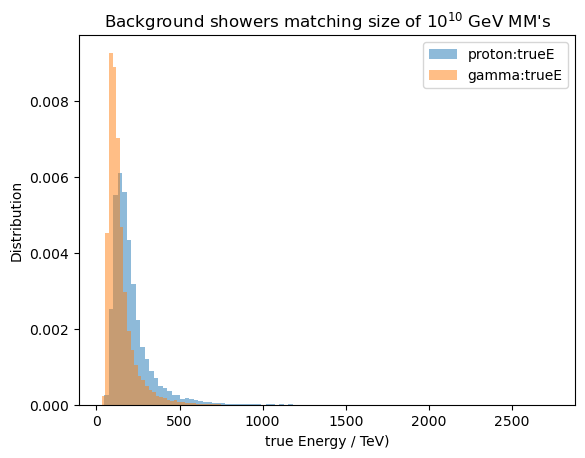

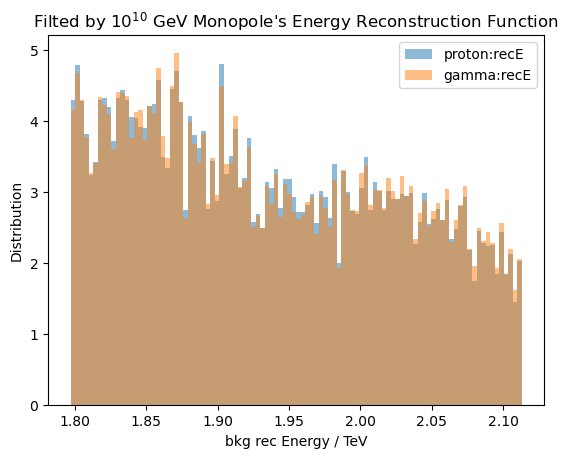

In [11]:
logE_pr = np.log10(pr_data_all["trueE"] / 1e3)
logE_ga = np.log10(ga_data_all["trueE"] / 1e3)
hist_pr, bins_pr = np.histogram(logE_pr, bins=100, density=True)
hist_ga, bins_ga = np.histogram(logE_ga, bins=100, density=True)
peak_logE_pr = (bins_pr[np.argmax(hist_pr)] + bins_pr[np.argmax(hist_pr) + 1]) / 2
peak_logE_ga = (bins_ga[np.argmax(hist_ga)] + bins_ga[np.argmax(hist_ga) + 1]) / 2
peakE_pr = 10 ** peak_logE_pr  # 转为 TeV
peakE_ga = 10 ** peak_logE_ga  # 转为 TeV
plt.hist(logE_pr, bins=100, label=f"Proton:peak~{peakE_pr:.2f} TeV", density=True, alpha=0.5)
plt.hist(logE_ga, bins=100, label=f"Gamma:peak~{peakE_ga:.2f} TeV", density=True, alpha=0.5)
plt.xlabel('log10(true Energy / TeV)')
plt.ylabel('Distribution')
plt.title(r"Background showers matching size of $10^{10}$ GeV MM's")
plt.legend()
plt.show()

plt.hist(pr_data_all["trueE"]/1e3, bins=100,label="proton:trueE", density=True, alpha=0.5)
plt.hist(ga_data_all["trueE"]/1e3, bins=100,label="gamma:trueE", density=True, alpha=0.5)
plt.xlabel('true Energy / TeV)')
plt.ylabel('Distribution')
plt.title(r"Background showers matching size of $10^{10}$ GeV MM's")
plt.legend()
plt.show()

plt.hist(pr_data_all['recE'], bins=100,label="proton:recE", density=True, alpha=0.5)
plt.hist(ga_data_all['recE'], bins=100,label="gamma:recE", density=True, alpha=0.5)
plt.xlabel('bkg rec Energy / TeV')
plt.ylabel('Distribution')
plt.title(r"Filted by $10^{10}$ GeV Monopole's Energy Reconstruction Function")
plt.legend()
plt.show()


Monopole events: 3572, Gamma events: 238794, Proton events: 163783


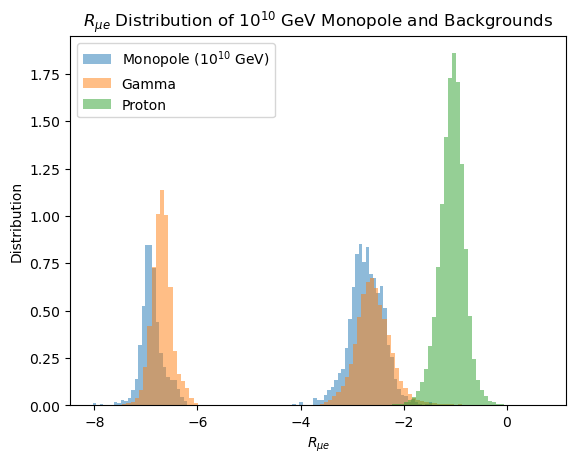

Proton events with R_ue<2.36: 3.05e-02%, with R_ue<3: 6.11e-03%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

all_data=pd.read_csv("/data/zhonghua/Dataset_Filted/ForTrain/combined_filted_1e10_V03_params_all.csv")
mndata_1e9=all_data[all_data["label"]==43]
gadata=all_data[all_data["label"]==1]
prdata=all_data[all_data["label"]==14]
print(f"Monopole events: {len(mndata_1e9)}, Gamma events: {len(gadata)}, Proton events: {len(prdata)}")

plt.hist(mndata_1e9['R_ue'], bins=100,label=r"Monopole ($10^{10}$ GeV)", density=True, alpha=0.5)
plt.hist(gadata['R_ue'], bins=100,label=r"Gamma", density=True, alpha=0.5)
plt.hist(prdata['R_ue'], bins=100,label=r"Proton", density=True, alpha=0.5)
plt.xlabel(r'$R_{\mu e}$')
plt.ylabel('Distribution')
plt.title(r"$R_{\mu e}$ Distribution of $10^{10}$ GeV Monopole and Backgrounds")
plt.legend()
plt.show()


ratio_1=len(prdata[prdata['R_ue']<-2.36])/len(prdata)
ratio_2=len(prdata[prdata['R_ue']<-3])/len(prdata)
print(f"Proton events with R_ue<2.36: {ratio_1*100:.2e}%, with R_ue<3: {ratio_2*100:.2e}%")

0.764320058866067
0.7362386611569215
0.08333333333333333
0.0007086544423775356
0.00010512345435671016
0.0
0.7679171332586786
Optimal R_ue Thresholds: -2.6000, with Significance: 1.7044, at mn_ratio=7.68e-01, pr_ratios=['7.09e-04', '1.05e-04', '0.00e+00'], ga_ratios=['7.64e-01', '7.36e-01', '8.33e-02']
Left: mn_num=5.84e+02, pr_num=9.89e+04, ga_num=1.84e+04
Ratio: mn=7.68e-01, pr=3.01e-04, ga=7.59e-01


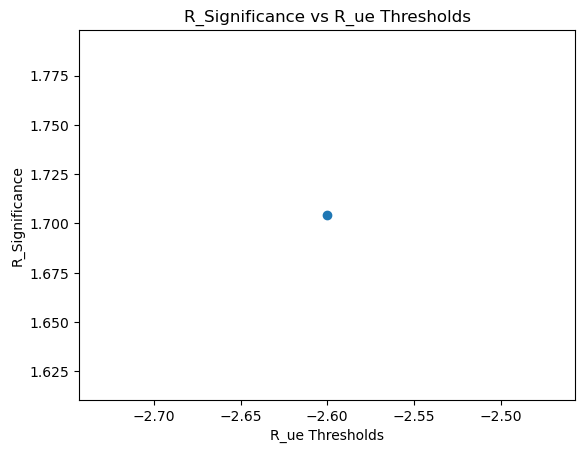

In [6]:
# 1e10 V03

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

ga_data_list=[  
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Monopole_combined_filted_1e10_V03_params.csv']
seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv.npz')
# data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv-proton.npz')
bkg=data['bkg_hist']
sig=data['sig_hist']

ga_nums=[7.93E+05*0.025296213, 2.20E+04*0.189300592, 2.25E+02*0.000142012]
pr_nums=[2.18E+10*0.004891248, 1.23E+09*0.18012071, 1.78E+07*0.003455621]
mn_nums=800*0.95
R_significancs=[]
GNN_significs=[]
mu_up_list=[]
# thresholds=np.arange(-2.8,-2.6, 0.01)
thresholds=[-2.6]
# thresholds=np.arange(-3,-2, 0.5)
for threshold in thresholds:
    ga_ratios=[]
    pr_ratios=[]
    mn_ratio=1
    for data_file in ga_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < threshold])
        print(num/len(df))
        ga_ratios.append(num/len(df))
    for data_file in pr_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < threshold])
        print(num/len(df))
        pr_ratios.append(num/len(df))
    for data_file in mn_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < threshold])
        print(num/len(df))
        mn_ratio=num/len(df)

    significance=(mn_nums*mn_ratio)/np.sqrt(np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios)))
    # print(f"Thresholds: {threshold}: \n mn={mn_ratio:.2e}\n pr={pr_ratios}\n ga={ga_ratios}\n Significance: {significance:.2e}\n")
    R_significancs.append(significance)
    
print(f"Optimal R_ue Thresholds: {thresholds[np.argmax(R_significancs)]:.4f}, with Significance: {max(R_significancs):.4f}, at mn_ratio={mn_ratio:.2e}, pr_ratios={[f'{r:.2e}' for r in pr_ratios]}, ga_ratios={[f'{r:.2e}' for r in ga_ratios]}")
print(f"Left: mn_num={mn_nums*mn_ratio:.2e}, pr_num={np.sum(np.array(pr_nums)*np.array(pr_ratios)):.2e}, ga_num={np.sum(np.array(ga_nums)*np.array(ga_ratios)):.2e}")
print(f"Ratio: mn={mn_ratio:.2e}, pr={np.sum(np.array(pr_nums)*np.array(pr_ratios))/np.sum(pr_nums):.2e}, ga={np.sum(np.array(ga_nums)*np.array(ga_ratios))/np.sum(ga_nums):.2e}")
plt.plot(thresholds,R_significancs,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('R_Significance')
plt.title('R_Significance vs R_ue Thresholds')
plt.show()



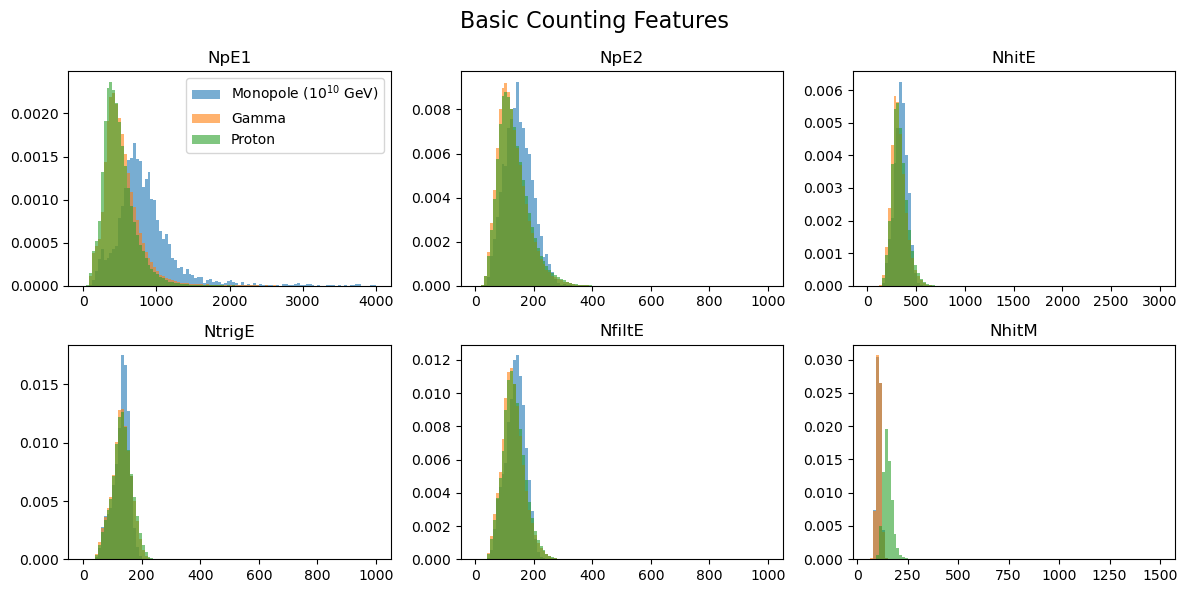

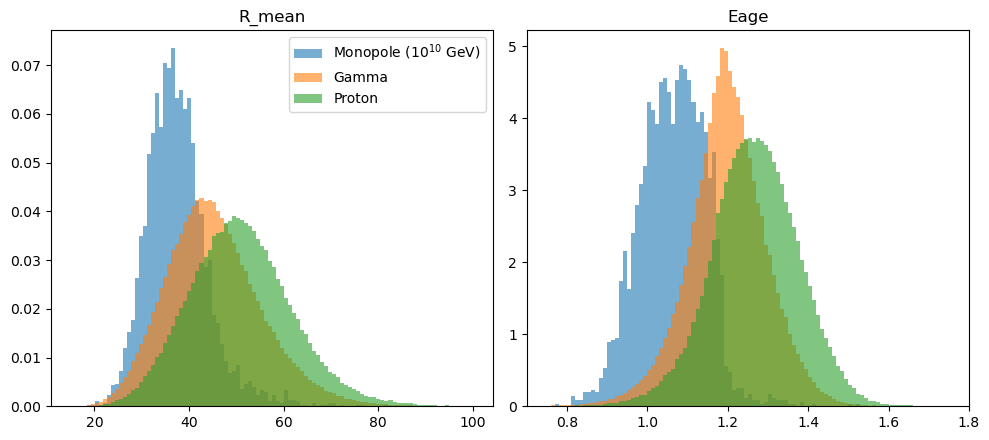

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

def plot_histograms(datasets, ranges_dict=None, labels=None, figsize=(15, 10)):
    # 默认取值范围
    if ranges_dict is None:
        ranges_dict = {
            'NpE1': (0, 500), 'NpE2': (0, 500), 'NhitE': (0, 1000), 'NtrigE': (0, 500),
            'NfiltE': (0, 500), 'NhitM': (0, 500), 'Eage': (0, 100), 
             'N_ED_pe': (0, 1e5), 'N_MD_pe': (0, 1e5),
            'R_ue': (0, 1), 'compactness': (0, 1), 'pincness': (0, 1), 'rho40': (0, 1),
            'R_mean': (0, 1)
        }

    # 如果没给 label，就默认 "dataset 1", "dataset 2", ...
    if labels is None:
        labels = [f"dataset {i+1}" for i in range(len(datasets))]

    # 定义每个大图需要画的特征
    fig1_features = ['NpE1', 'NpE2', 'NhitE', 'NtrigE', 'NfiltE', 'NhitM']
    # fig2_features = [(, None), ('Echi2/Endf', ('Echi', 'Endf')),
    #                  ]
    fig3_features = ['R_mean','Eage']

    # -------- 图1 --------
    fig1, axs1 = plt.subplots(2, 3, figsize=(12, 6))
    fig1.suptitle('Basic Counting Features', fontsize=16)
    axs1 = axs1.flatten()
    for idx, feature in enumerate(fig1_features):
        for data, label in zip(datasets, labels):
            axs1[idx].hist(data[feature], bins=100, density=True,
                           range=ranges_dict[feature], label=label, alpha=0.6)
        axs1[idx].set_title(feature)
        if idx == 0:
            axs1[idx].legend()
        
    plt.tight_layout()


    # -------- 图3 --------
    fig3, axs3 = plt.subplots(1, 2, figsize=(10,4.5))
    # fig3.suptitle('Other Features', fontsize=16)
    axs3 = axs3.flatten()
    for idx, feature in enumerate(fig3_features):
        ax = axs3[idx]

        for data, label in zip(datasets, labels):
            values = data[feature]
            ax.hist(values, bins=100, density=True, range=ranges_dict[feature], label=label, alpha=0.6)
           
        ax.set_title(feature)
        if idx == 0:
            ax.legend(loc="best")

    
    plt.tight_layout()
    plt.savefig("./PPT_figs/params_1e10.png", dpi=300)
    plt.show()





# 1e10 V03

ga_data_list=[  
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Monopole_combined_filted_1e10_V03_params.csv']

mndata_1e10=pd.concat([pd.read_csv(f) for f in mn_data_list], ignore_index=True)
gadata=pd.concat([pd.read_csv(f) for f in ga_data_list], ignore_index=True)
prdata=pd.concat([pd.read_csv(f) for f in pr_data_list], ignore_index=True)
ranges_dict = {
            'NpE1': (0, 4000),
            'NpE2': (0, 1000),
            'NhitE': (0, 3000),
            'NtrigE': (0, 1000),
            'NfiltE': (0, 1000),
            'NhitM': (50, 1500),
            'Eage': (0.75, 1.75),
            # 'Echi2/Endf': (0, 10),
           
            'N_ED_pe': (0, 4000),
            'N_MD_pe': (0, 300),
            'R_ue': (-7.5, 2.5),
            'compactness': (0, 0.9),
            'pincness': (0.65, 0.92),
            'rho40': (0,250),
            'R_mean': (15,100)
        }
custom_labels = {
    "mndata_1e9": r"Monopole ($10^{10}$ GeV)",
    "gadata": "Gamma",
    "prdata": "Proton"
}

plot_histograms(
    datasets=[mndata_1e10, gadata, prdata],
    labels=custom_labels.values(),
    ranges_dict=ranges_dict
)

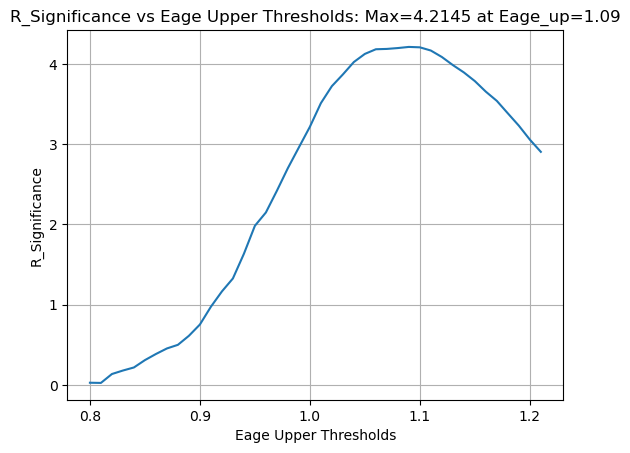

In [29]:
def filter_step3(data_list:dict, threshold_list:dict):
    filtered_dict = {}
    ratio_left = {}

    for name, df in data_list.items():
        n_before = len(df)
        mask = np.ones(n_before, dtype=bool)

        for feature, (low, high) in threshold_list.items():
            if feature in df.columns:
                mask &= (df[feature] >= low) & (df[feature] <= high)
            else:
                print(f"⚠️ Warning: {feature} not in {name}, skipped")

        df_filtered = df[mask].copy()
        n_after = len(df_filtered)

        # print(f"{name:12s}: {n_before:7d} → {n_after:7d}  ({n_after/n_before:.5%} 保留)")
        filtered_dict[name] = df_filtered
        ratio_left[name] = n_after/n_before

    return filtered_dict, ratio_left

data_list = {
    "mndata_1e10": mndata_1e10,
    "gadata": gadata,
    "prdata": prdata
}

mn_nums=5.84E+02
ga_nums=1.84E+04
pr_nums=9.89E+04
significances=[]
Eage_ups=np.arange(0.8, 1.22, 0.01)
for Eage_up in Eage_ups:
    threshold_list = {
        'Eage': (0.25, Eage_up),
        # 'R_mean': (0, 40),
    }



    filtered_data, ratio_left = filter_step3(data_list, threshold_list)
    mn_ratio = ratio_left["mndata_1e10"]
    pr_ratio = ratio_left["prdata"]
    ga_ratio = ratio_left["gadata"]
    significance = (mn_nums * mn_ratio) / np.sqrt(pr_nums * pr_ratio + ga_nums * ga_ratio)
    significances.append(significance)

plt.plot(Eage_ups, significances)
plt.xlabel('Eage Upper Thresholds')
plt.ylabel('R_Significance')
plt.title(f'R_Significance vs Eage Upper Thresholds: Max={max(significances):.4f} at Eage_up={Eage_ups[np.argmax(significances)]:.2f}')
plt.grid()
plt.show()

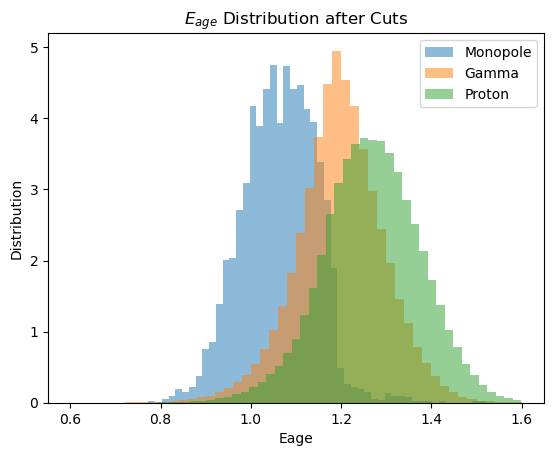

mu=3.000e-01, CLs=0.242, q_obs=1.44
mu=3.053e-01, CLs=0.234, q_obs=1.49
mu=3.105e-01, CLs=0.230, q_obs=1.54
mu=3.158e-01, CLs=0.182, q_obs=1.59
mu=3.211e-01, CLs=0.205, q_obs=1.64
mu=3.263e-01, CLs=0.186, q_obs=1.70
mu=3.316e-01, CLs=0.193, q_obs=1.75
mu=3.368e-01, CLs=0.175, q_obs=1.81
mu=3.421e-01, CLs=0.177, q_obs=1.87
mu=3.474e-01, CLs=0.171, q_obs=1.92
mu=3.526e-01, CLs=0.152, q_obs=1.98
mu=3.579e-01, CLs=0.150, q_obs=2.04
mu=3.632e-01, CLs=0.161, q_obs=2.10
mu=3.684e-01, CLs=0.140, q_obs=2.16
mu=3.737e-01, CLs=0.144, q_obs=2.22
mu=3.789e-01, CLs=0.134, q_obs=2.29
mu=3.842e-01, CLs=0.131, q_obs=2.35
mu=3.895e-01, CLs=0.124, q_obs=2.42
mu=3.947e-01, CLs=0.108, q_obs=2.48
mu=4.000e-01, CLs=0.108, q_obs=2.55
没有找到小于0.1的 CLs, 请扩大 mu 范围


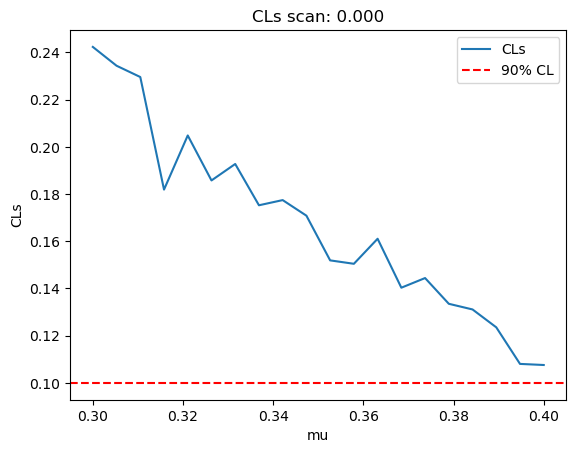

In [50]:
# 1e10 V03 Eage<1.09
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

# 泊松似然
def poisson_likelihood(mu, n_obs, s_counts, b_counts):
    lam = mu * s_counts + b_counts
    lam = np.clip(lam, 1e-12, None)
    logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
    return logL

# test statistic: q_mu
def q_mu(mu, n_obs, s_counts, b_counts):
    logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
    # 找到 best fit (mu_hat>=0)
    mu_hat_grid = np.linspace(0, 0.2, 50)
    logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
    mu_hat = mu_hat_grid[np.argmax(logL_vals)]
    logL_max = np.max(logL_vals)
    return -2 * (logL_mu - logL_max), mu_hat

# 生成 toy 数据
def generate_toys(mu, s_counts, b_counts, n_toys=1000):
    lam = mu * s_counts + b_counts
    return np.random.poisson(lam, size=(n_toys, len(lam)))

# CLs 计算
def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
    q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

    # toys under signal+background
    toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
    q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
    p_mu = np.mean(np.array(q_sb) >= q_obs)

    # toys under background only
    toys_b = generate_toys(0, s_counts, b_counts, n_toys)
    q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
    p_b = np.mean(np.array(q_b) >= q_obs)

    CLs = p_mu / (1 - p_b + 1e-12)
    return CLs, q_obs


Eage_up=1.6
mn_data_sel=mndata_1e10[(mndata_1e10['Eage']<Eage_up)]['Eage']
# print(mn_data_sel.values)
gadata_sel=gadata[(gadata['Eage']<Eage_up)]['Eage']
prdata_sel=prdata[(prdata['Eage']<Eage_up)]['Eage']
mn_nums=5.84E+02
ga_nums=1.84E+04
pr_nums=9.89E+04

plt.hist(mn_data_sel, bins=50, density=True, alpha=0.5, label="Monopole")
plt.hist(gadata_sel, bins=50, density=True, alpha=0.5, label="Gamma")
plt.hist(prdata_sel, bins=50, density=True, alpha=0.5, label="Proton")
plt.xlabel('Eage')
plt.ylabel('Distribution')
plt.title(r"$E_{age}$ Distribution after Cuts")
plt.legend()
plt.show()

sig_hist=mn_data_sel.values
bkg_hist=np.concatenate([gadata_sel.values,prdata_sel.values], axis=0)
# print(len(sig_hist), len(bkg_hist), len(mndata_1e10), len(gadata_sel), len(prdata_sel))
sig_num=mn_nums
bkg_num=ga_nums+pr_nums
# sig_num*=5
# bkg_num*=5
threshold=0.
bins=50
# hypothesis test H1: sig+bkg, H0: bkg only, 
s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=(mn_data_sel.min(),mn_data_sel.max()))
b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=(mn_data_sel.min(),mn_data_sel.max()))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
mask = bin_centers > threshold
bin_widths = np.diff(bin_edges)[mask]
s_pdf_cut=s_pdf[mask]
b_pdf_cut=b_pdf[mask]
s_counts = s_pdf_cut*sig_num*bin_widths
b_counts = b_pdf_cut*bkg_num*bin_widths

counts,_ = np.histogram(bkg_hist, bins=bins, density=True, range=(mn_data_sel.min(),mn_data_sel.max()))
n_obs_pdf_cut = counts[mask]
n_obs = n_obs_pdf_cut * bkg_num * bin_widths

mu_scan = np.linspace(3e-1, 4e-1, 20)
# mu_scan = np.linspace(0, 5e-5, 10)
CLs_list = []
for mu in mu_scan:
    CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=3000)
    print(f"mu={mu:.3e}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
    CLs_list.append(CLs_val)

# 找到90% CL 上限
mask = np.array(CLs_list) < 0.1
if np.any(mask):
    mu_upper = mu_scan[np.where(mask)[0][0]]
    print("90% CL upper limit on mu =", mu_upper)
else:
    print("没有找到小于0.1的 CLs, 请扩大 mu 范围")

plt.plot(mu_scan, CLs_list, label="CLs")
plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
plt.xlabel("mu")
plt.ylabel("CLs")
plt.title(f"CLs scan: {mu_upper:.3f}")
plt.legend()
plt.show()

mu=3.000e-01, CLs=0.156, q_obs=2.52
mu=3.111e-01, CLs=0.143, q_obs=2.66
mu=3.222e-01, CLs=0.125, q_obs=2.80
mu=3.333e-01, CLs=0.135, q_obs=2.94
mu=3.444e-01, CLs=0.108, q_obs=3.08
mu=3.556e-01, CLs=0.106, q_obs=3.23
mu=3.667e-01, CLs=0.091, q_obs=3.38
mu=3.778e-01, CLs=0.072, q_obs=3.53
mu=3.889e-01, CLs=0.080, q_obs=3.69
mu=4.000e-01, CLs=0.059, q_obs=3.85
✅ 90% CL upper limit on mu = 3.667e-01


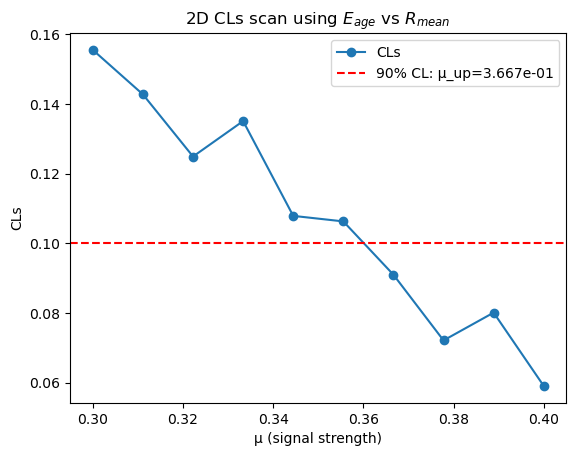

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

# --------------------------------------------------------
#  Poisson likelihood + test statistic + toy generator
# --------------------------------------------------------

def poisson_likelihood(mu, n_obs, s_counts, b_counts):
    lam = mu * s_counts + b_counts
    lam = np.clip(lam, 1e-12, None)
    logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
    return logL

def q_mu(mu, n_obs, s_counts, b_counts):
    logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
    mu_hat_grid = np.linspace(0, 0.2, 50)
    logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
    mu_hat = mu_hat_grid[np.argmax(logL_vals)]
    logL_max = np.max(logL_vals)
    return -2 * (logL_mu - logL_max), mu_hat

def generate_toys(mu, s_counts, b_counts, n_toys=1000):
    lam = mu * s_counts + b_counts
    return np.random.poisson(lam, size=(n_toys, len(lam)))

def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
    q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

    toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
    q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
    p_mu = np.mean(np.array(q_sb) >= q_obs)

    toys_b = generate_toys(0, s_counts, b_counts, n_toys)
    q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
    p_b = np.mean(np.array(q_b) >= q_obs)

    CLs = p_mu / (1 - p_b + 1e-12)
    return CLs, q_obs


# --------------------------------------------------------
#  数据准备 (二维直方图版本)
# --------------------------------------------------------
ga_data_list=[  
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Monopole_combined_filted_1e10_V03_params.csv']

mndata_1e10=pd.concat([pd.read_csv(f) for f in mn_data_list], ignore_index=True)
gadata=pd.concat([pd.read_csv(f) for f in ga_data_list], ignore_index=True)
prdata=pd.concat([pd.read_csv(f) for f in pr_data_list], ignore_index=True)

# Eage_up = 1.6
# mn_data_sel = mndata_1e10[mndata_1e10["Eage"] < Eage_up]
# gadata_sel = gadata[gadata["Eage"] < Eage_up]
# prdata_sel = prdata[prdata["Eage"] < Eage_up]
Eage_thr=[0.8,1.2]
Rmean_thr=[20,60]
mn_data_sel = mndata_1e10[(mndata_1e10["Eage"] > Eage_thr[0]) & (mndata_1e10["Eage"] < Eage_thr[1]) & (mndata_1e10["R_mean"] > Rmean_thr[0]) & (mndata_1e10["R_mean"] < Rmean_thr[1])]
gadata_sel = gadata[(gadata["Eage"] > Eage_thr[0]) & (gadata["Eage"] < Eage_thr[1]) & (gadata["R_mean"] > Rmean_thr[0]) & (gadata["R_mean"] < Rmean_thr[1])]
prdata_sel = prdata[(prdata["Eage"] > Eage_thr[0]) & (prdata["Eage"] < Eage_thr[1]) & (prdata["R_mean"] > Rmean_thr[0]) & (prdata["R_mean"] < Rmean_thr[1])]

sig_x = mn_data_sel["Eage"].values
sig_y = mn_data_sel["R_mean"].values
bkg_x = np.concatenate([gadata_sel["Eage"].values, prdata_sel["Eage"].values])
bkg_y = np.concatenate([gadata_sel["R_mean"].values, prdata_sel["R_mean"].values])

sig_num = 5.84e2
ga_nums = 1.84e4
pr_nums = 9.89e4
bkg_num = ga_nums + pr_nums

xbins, ybins = 50, 50
range_x = (min(sig_x.min(), bkg_x.min()), max(sig_x.max(), bkg_x.max()))
range_y = (min(sig_y.min(), bkg_y.min()), max(sig_y.max(), bkg_y.max()))

from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 图
# 计算 2D 直方图
sig_H, xedges, yedges = np.histogram2d(sig_x, sig_y, bins=(xbins, ybins), range=(range_x, range_y), density=True)
bkg_H, _, _ = np.histogram2d(bkg_x, bkg_y, bins=(xbins, ybins), range=(range_x, range_y), density=True)

# 取 bin 中心点
xpos, ypos = np.meshgrid(
    (xedges[:-1] + xedges[1:]) / 2,
    (yedges[:-1] + yedges[1:]) / 2,
    indexing="ij"
)
xpos = xpos.ravel()
ypos = ypos.ravel()

# 信号和背景的高度
zpos = np.zeros_like(xpos)
dx = dy = 0.9 * (xedges[1] - xedges[0])  # 柱子的宽度
dz_sig = sig_H.ravel()
dz_bkg = bkg_H.ravel()


# 计算 2D hist，归一化为 PDF
s_pdf, xedges, yedges = np.histogram2d(sig_x, sig_y, bins=(xbins, ybins), range=(range_x, range_y), density=True)
b_pdf, _, _ = np.histogram2d(bkg_x, bkg_y, bins=(xbins, ybins), range=(range_x, range_y), density=True)

# bin 面积
dx = np.diff(xedges)[0]
dy = np.diff(yedges)[0]
bin_area = dx * dy

# 期望事件数
s_counts = s_pdf.flatten() * sig_num * bin_area
b_counts = b_pdf.flatten() * bkg_num * bin_area

n_obs=b_counts.copy()  # Asimov 数据

# --------------------------------------------------------
#  计算 CLs 上限
# --------------------------------------------------------

mu_scan = np.linspace(0.3, 0.4, 10)
CLs_list = []

for mu in mu_scan:
    CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=3000)
    print(f"mu={mu:.3e}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
    CLs_list.append(CLs_val)

mask = np.array(CLs_list) < 0.1
if np.any(mask):
    mu_upper = mu_scan[np.where(mask)[0][0]]
    print(f"✅ 90% CL upper limit on mu = {mu_upper:.3e}")
else:
    mu_upper = np.nan
    print("⚠️ 没有找到 CLs<0.1，请扩大 mu 范围")


plt.plot(mu_scan, CLs_list, marker="o", label="CLs")
plt.axhline(0.1, color="r", linestyle="--", label=f"90% CL: μ_up={mu_upper:.3e}")

plt.xlabel("μ (signal strength)")
plt.ylabel("CLs")
plt.title(r"2D CLs scan using $E_{age}$ vs $R_{mean}$")
plt.legend()
plt.show()


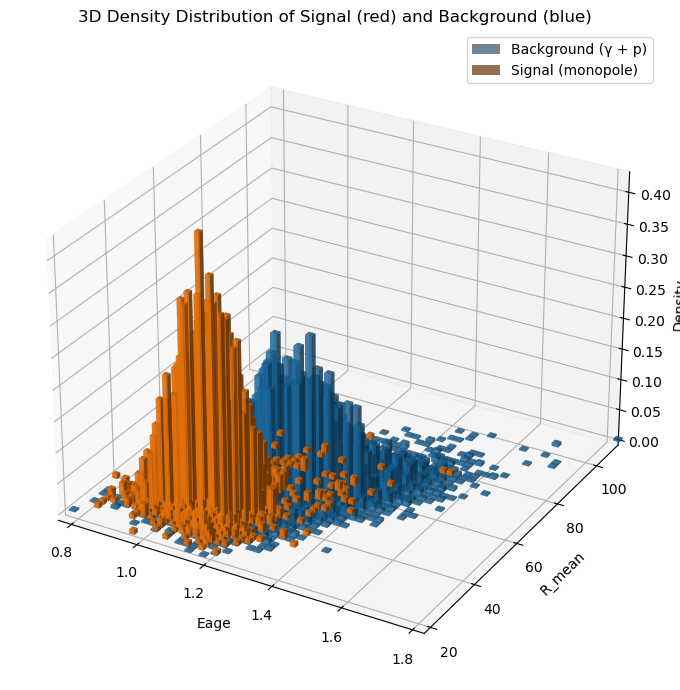

In [103]:
def plot_3d_density(sig_x, sig_y, bkg_x, bkg_y,
                    x_range=None, y_range=None, bins=40,
                    xlabel="Eage", ylabel="R_mean"):
    """
    绘制信号和背景在 (Eage, R_mean) 平面上的 3D 密度直方图。
    """

    # 自动确定范围
    if x_range is None:
        x_range = [min(sig_x.min(), bkg_x.min()), max(sig_x.max(), bkg_x.max())]
    if y_range is None:
        y_range = [min(sig_y.min(), bkg_y.min()), max(sig_y.max(), bkg_y.max())]

    # ----------------------------
    # 计算 2D 密度直方图
    # ----------------------------
    sig_H, xedges, yedges = np.histogram2d(sig_x, sig_y, bins=bins,
                                           range=[x_range, y_range], density=True)
    bkg_H, _, _ = np.histogram2d(bkg_x, bkg_y, bins=bins,
                                 range=[x_range, y_range], density=True)

    # bin 中心坐标
    xpos, ypos = np.meshgrid(
        (xedges[:-1] + xedges[1:]) / 2,
        (yedges[:-1] + yedges[1:]) / 2,
        indexing="ij"
    )

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like(xpos)

    dx = (xedges[1] - xedges[0]) * 0.9
    dy = (yedges[1] - yedges[0]) * 0.9

    dz_sig = sig_H.flatten()
    dz_bkg = bkg_H.flatten()

    # ----------------------------
    # 绘图
    # ----------------------------
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # 背景蓝色
    mask_bkg = dz_bkg > 0
    colors_bkg = plt.cm.Blues(dz_bkg[mask_bkg] / dz_bkg.max())
    ax.bar3d(
        xpos[mask_bkg],
        ypos[mask_bkg],
        zpos[mask_bkg],
        dx,
        dy,
        dz_bkg[mask_bkg],
        
        alpha=0.6,
        zsort='min',
        label="Background (γ + p)"
    )

    # 信号红色（稍偏移，避免完全重叠）
    mask_sig = dz_sig > 0
    colors_sig = plt.cm.Reds(dz_sig[mask_sig] / dz_sig.max())
    ax.bar3d(
        xpos[mask_sig] + dx*0.2,
        ypos[mask_sig] + dy*0.2,
        zpos[mask_sig],
        dx*0.8,
        dy*0.8,
        dz_sig[mask_sig],
        
        alpha=0.7,
        zsort='min',
        label="Signal (monopole)"
    )

    # ----------------------------
    # 坐标轴与样式
    # ----------------------------
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel("Density")
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_title("3D Density Distribution of Signal (red) and Background (blue)")
    ax.legend(loc="upper right")
    ax.view_init(elev=28, azim=-60)  # 调整视角
    plt.tight_layout()
    plt.show()


plot_3d_density(
    sig_x = mndata_1e10['Eage'].values,
    sig_y = mndata_1e10['R_mean'].values,
    bkg_x = np.concatenate([gadata['Eage'].values, prdata['Eage'].values]),
    bkg_y = np.concatenate([gadata['R_mean'].values, prdata['R_mean'].values]),
    bins = 50,
    xlabel = "Eage",
    ylabel = "R_mean"
)



Validation AUC = 0.9036


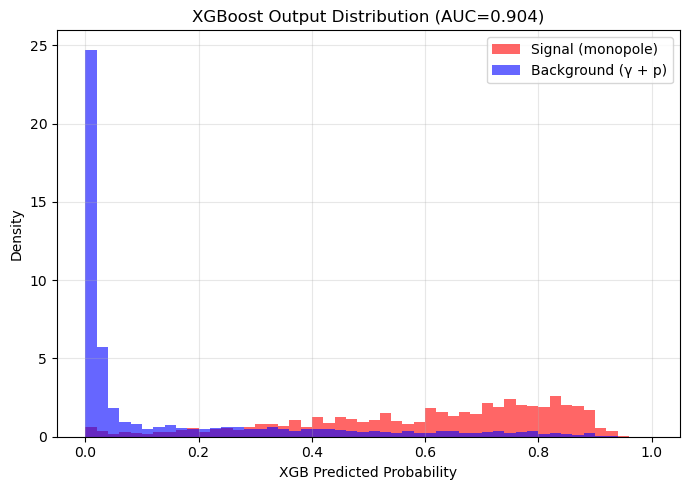

Test AUC = 0.9026


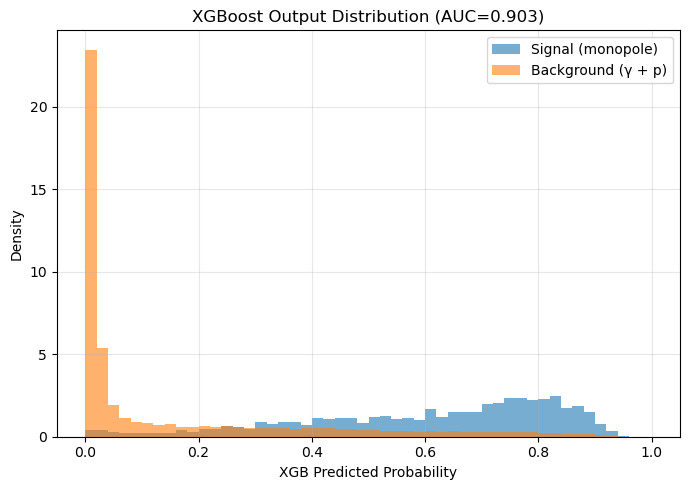

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
ga_data_list=[  
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Monopole_combined_filted_1e10_V03_params.csv']

mndata_1e10=pd.concat([pd.read_csv(f) for f in mn_data_list], ignore_index=True)
gadata_all=pd.concat([pd.read_csv(f) for f in ga_data_list], ignore_index=True)
prdata_all=pd.concat([pd.read_csv(f) for f in pr_data_list], ignore_index=True)

gadata = gadata_all.sample(n=5000, random_state=42)  # 随机采样部分背景数据，防止过大
prdata = prdata_all.sample(n=5000, random_state=42)

# ====== 数据准备 ======
sig_x = mndata_1e10['Eage'].values
sig_y = mndata_1e10['R_mean'].values

bkg_x = np.concatenate([gadata['Eage'].values, prdata['Eage'].values])
bkg_y = np.concatenate([gadata['R_mean'].values, prdata['R_mean'].values])

# 构造特征矩阵和标签
X_sig = np.column_stack((sig_x, sig_y))
X_bkg = np.column_stack((bkg_x, bkg_y))
X = np.concatenate([X_sig, X_bkg])
y = np.concatenate([np.ones(len(X_sig)), np.zeros(len(X_bkg))])

X_sig_test = mndata_1e10[['Eage', 'R_mean']].values
X_bkg_test = np.concatenate([gadata_all[['Eage', 'R_mean']].values, prdata_all[['Eage', 'R_mean']].values])
X_test = np.concatenate([X_sig_test, X_bkg_test])
y_test = np.concatenate([np.ones(len(X_sig_test)), np.zeros(len(X_bkg_test))])

# ====== 划分训练/验证 ======
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ====== 训练 XGBoost 分类器 ======
model = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# ====== 预测 ======
y_pred_val = model.predict_proba(X_val)[:, 1]  # softmax输出为信号概率

# ====== 评估性能 ======
auc = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC = {auc:.4f}")
sig_hist_val = y_pred_val[y_val==1]
bkg_hist_val = y_pred_val[y_val==0]
# ====== 绘制结果直方图（密度分布） ======
plt.figure(figsize=(7,5))
plt.hist(y_pred_val[y_val==1], bins=50, range=(0,1), density=True, alpha=0.6, color='r', label='Signal (monopole)')
plt.hist(y_pred_val[y_val==0], bins=50, range=(0,1), density=True, alpha=0.6, color='b', label='Background (γ + p)')
plt.xlabel('XGB Predicted Probability')
plt.ylabel('Density')
plt.title(f'XGBoost Output Distribution (AUC={auc:.3f})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# test
y_pred_test = model.predict_proba(X_test)[:, 1]  # softmax输出为信号概率
auc_test = roc_auc_score(y_test, y_pred_test)
print(f"Test AUC = {auc_test:.4f}")
sig_hist_test = y_pred_test[y_test==1]
bkg_hist_test = y_pred_test[y_test==0]
plt.figure(figsize=(7,5))
plt.hist(sig_hist_test, bins=50, range=(0,1), density=True, alpha=0.6, label='Signal (monopole)')
plt.hist(bkg_hist_test, bins=50, range=(0,1), density=True, alpha=0.6, label='Background (γ + p)')
plt.xlabel('XGB Predicted Probability')
plt.ylabel('Density')
plt.title(f'XGBoost Output Distribution (AUC={auc_test:.3f})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [102]:


def CLs_(sig_hist, bkg_hist, sig_num, bkg_num, n_toys=3000):
    import numpy as np
    from scipy.special import gammaln

    # 泊松似然
    def poisson_likelihood(mu, n_obs, s_counts, b_counts):
        lam = mu * s_counts + b_counts
        lam = np.clip(lam, 1e-12, None)
        logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
        return logL

    # test statistic: q_mu
    def q_mu(mu, n_obs, s_counts, b_counts):
        logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
        # 找到 best fit (mu_hat>=0)
        mu_hat_grid = np.linspace(0, 0.2, 50)
        logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
        mu_hat = mu_hat_grid[np.argmax(logL_vals)]
        logL_max = np.max(logL_vals)
        return -2 * (logL_mu - logL_max), mu_hat

    # 生成 toy 数据
    def generate_toys(mu, s_counts, b_counts, n_toys=1000):
        lam = mu * s_counts + b_counts
        return np.random.poisson(lam, size=(n_toys, len(lam)))

    # CLs 计算
    def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
        q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

        # toys under signal+background
        toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
        q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
        p_mu = np.mean(np.array(q_sb) >= q_obs)

        # toys under background only
        toys_b = generate_toys(0, s_counts, b_counts, n_toys)
        q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
        p_b = np.mean(np.array(q_b) >= q_obs)

        CLs = p_mu / (1 - p_b + 1e-12)
        return CLs, q_obs

    
    # sig_num*=5
    # bkg_num*=5
    threshold=0.6
    bins=50

    s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=(0,1))
    b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=(0,1))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mask = bin_centers > threshold
    bin_widths = np.diff(bin_edges)[mask]
    s_pdf_cut=s_pdf[mask]
    b_pdf_cut=b_pdf[mask]
    s_counts = s_pdf_cut*sig_num*bin_widths
    b_counts = b_pdf_cut*bkg_num*bin_widths
    
    n_obs = b_counts.copy()  # Asimov 数据

    mu_scan = np.linspace(0.42, 0.46, 10)
    CLs_list = []
    for mu in mu_scan:
        CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=n_toys)
        print(f"mu={mu:.3f}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
        CLs_list.append(CLs_val)

    # 找到90% CL 上限
    mask = np.array(CLs_list) < 0.1
    if np.any(mask):
        mu_upper = mu_scan[np.where(mask)[0][0]]
        print("90% CL upper limit on mu =", mu_upper)
    else:
        print("没有找到小于0.1的 CLs, 请扩大 mu 范围")

    plt.plot(mu_scan, CLs_list, label="CLs")
    plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
    plt.xlabel("mu")
    plt.ylabel("CLs")
    plt.title(f"CLs scan: {mu_upper:.3f}")
    plt.legend()
    plt.show()


sig_num = 5.84e2
ga_nums = 1.84e4
pr_nums = 9.89e4
bkg_num = ga_nums + pr_nums
# CLs_(sig_hist_test, bkg_hist_test, sig_num=sig_num, bkg_num=bkg_num, n_toys=5000)
CLs_(sig_hist_val, bkg_hist_val, sig_num=sig_num, bkg_num=bkg_num, n_toys=5000)

mu=0.420, CLs=0.092, q_obs=2.98


KeyboardInterrupt: 